In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-8-f8c6e4ed5798>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age'])


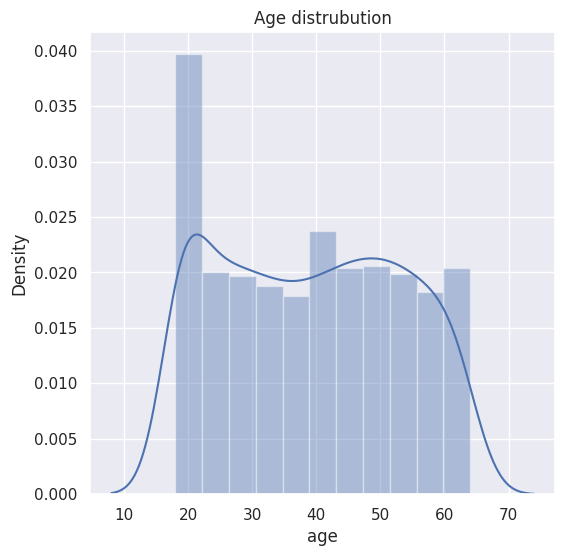

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['age'])
plt.title('Age distrubution')
plt.show()

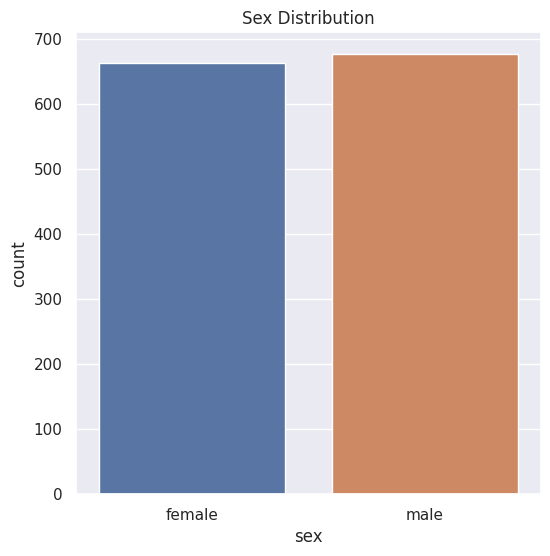

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-12-a1b679eb609a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])


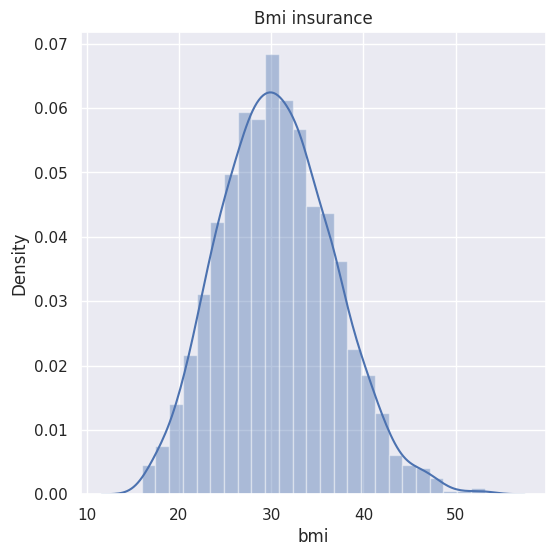

In [12]:
plt.figure(figsize=(6,6))
sns.distplot(insurance['bmi'])
plt.title('Bmi insurance')
plt.show()

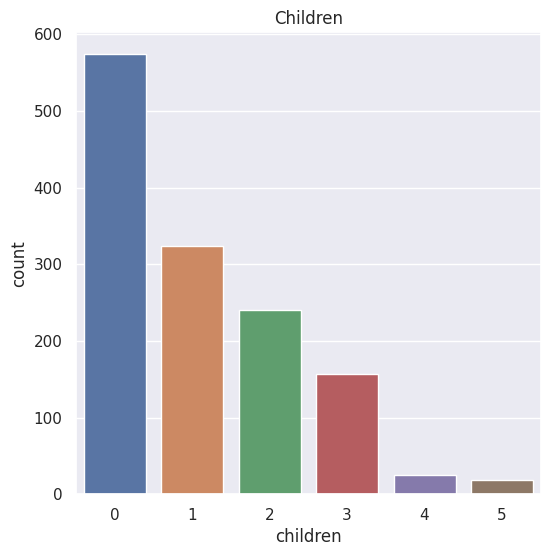

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance)
plt.title('Children')
plt.show()

In [15]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

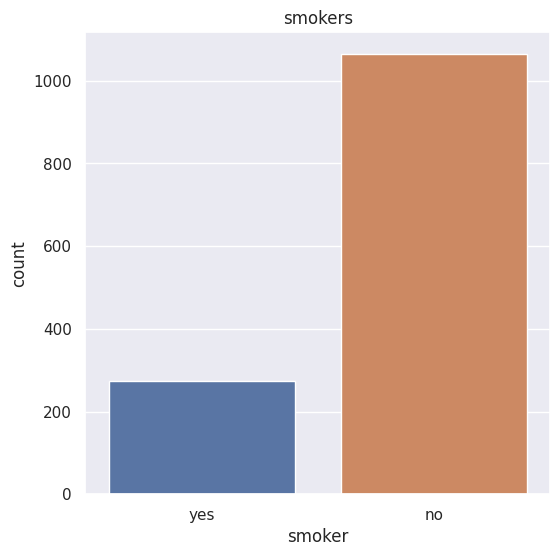

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance)
plt.title('smokers')
plt.show()

In [17]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

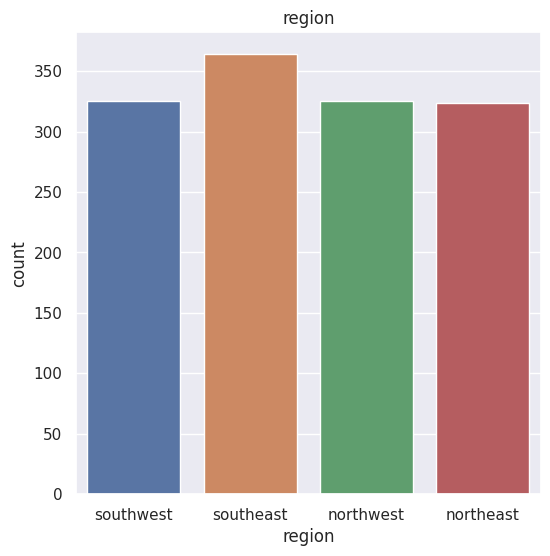

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance)
plt.title('region')
plt.show()

<ipython-input-19-a76bcf3cadb9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


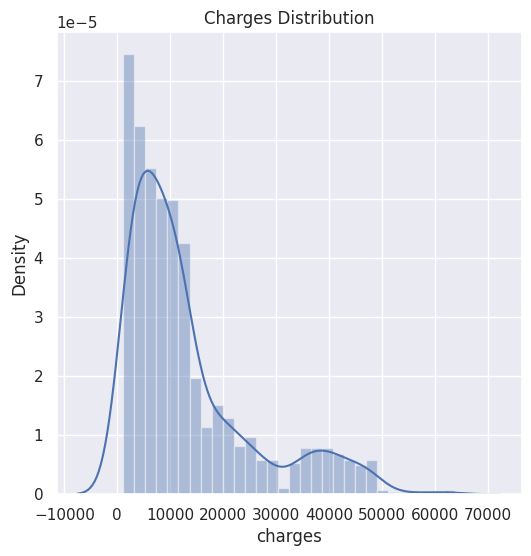

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(insurance['charges'])
plt.title('Charges Distribution')
plt.show()

In [21]:
# encoding sex column
insurance.replace({'sex':{'male':0,'female':1}}, inplace=True)
insurance.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [22]:
x=insurance.drop(columns='charges',axis=1)
y=insurance['charges']
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [27]:
trainpred = regressor.predict(xtrain)
r2_train = metrics.r2_score(ytrain,trainpred)
print(r2_train)

0.751505643411174


In [30]:
testpred=regressor.predict(xtest)
r2_test = metrics.r2_score(ytest,testpred)
print(r2_test)

0.7447273869684076


In [33]:
input = (31,1,25.74,0,1,0)
inputasnumpyarray = np.asarray(input)
input_data_reshaped = inputasnumpyarray.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD', prediction[0])

[3760.0805765]
The insurance cost is USD 3760.080576496057


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
